### Crime Description Classification with ML
+ Assigning text to their predefined category or class
+ Grouping text into their classes

+ Using Crime Dataset
+ Predict the Crime Schedule of a Crime Description/Category


### Workflow
+ EDA
+ Building Features From the Text
    - Vectorization (Tfidf,CountVectorizer)
+ Model Building
    - Single Approach
    - Pipeline Approach
    
+ Model Evaluation
+ Model Interpretation
+ Productionize Model

In [1]:
# Load EDA Pkgs
import pandas as pd
import neattext.functions as nfx

In [2]:
# Load Data Viz
import seaborn as sns

In [3]:
# Load ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [4]:
# Load Dataset
df = pd.read_csv("../Data Storage/Crime Stats-za/crime_stats_schedul3.csv")

In [5]:
df.head()

,Unnamed: 0,Province,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,Total 2005-2016,Crime Schedule,Crime Description
0,0,Western Cape,Cape Town Central,All theft not mentioned elsewhere,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176,61631,Schedule 2 (Minor Offences),All theft not mentioned elsewhere; theft (valu...
1,1,Gauteng,Jhb Central,All theft not mentioned elsewhere,6093,4602,3761,3610,3267,3037,2886,2638,2809,3050,2434,38187,Schedule 2 (Minor Offences),All theft not mentioned elsewhere; theft (valu...
2,2,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635,60624,Schedule 2 (Minor Offences),All theft not mentioned elsewhere; theft (valu...
3,3,Free State,Park Road,All theft not mentioned elsewhere,5108,4282,3834,3316,3101,3013,2679,3116,2927,2297,2103,35776,Schedule 2 (Minor Offences),All theft not mentioned elsewhere; theft (valu...
4,4,Gauteng,Pretoria Central,All theft not mentioned elsewhere,5099,4536,3309,2694,2616,2606,2635,3226,3246,2892,3030,35889,Schedule 2 (Minor Offences),All theft not mentioned elsewhere; theft (valu...


In [6]:
# Shape
df.shape

(28575, 18)

In [7]:
df[['Crime Description','Crime Schedule']]

,Crime Description,Crime Schedule
0,All theft not mentioned elsewhere; theft (valu...,Schedule 2 (Minor Offences)
1,All theft not mentioned elsewhere; theft (valu...,Schedule 2 (Minor Offences)
2,All theft not mentioned elsewhere; theft (valu...,Schedule 2 (Minor Offences)
3,All theft not mentioned elsewhere; theft (valu...,Schedule 2 (Minor Offences)
4,All theft not mentioned elsewhere; theft (valu...,Schedule 2 (Minor Offences)
...,...,...
28570,All theft not mentioned elsewhere; theft (valu...,Schedule 2 (Minor Offences)
28571,All theft not mentioned elsewhere; theft (valu...,Schedule 2 (Minor Offences)
28572,"Drug-related crime; crime to use, possess or p...",Schedule 5 (Serious Offences)
28573,All theft not mentioned elsewhere; theft (valu...,Schedule 2 (Minor Offences)


### Text Preprocessing
###### Cleaning the Data
+ Reduce Noise
    - Punct
    - Special Char
    - Stopword
+ Lemmatization/Stemming

In [8]:
# View Libraries for Cleaning Text Data
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [9]:
df['Crime Description'].apply(nfx.remove_stopwords)

0        theft mentioned elsewhere; theft (value exceed...
1        theft mentioned elsewhere; theft (value exceed...
2        theft mentioned elsewhere; theft (value exceed...
3        theft mentioned elsewhere; theft (value exceed...
4        theft mentioned elsewhere; theft (value exceed...
                               ...                        
28570    theft mentioned elsewhere; theft (value exceed...
28571    theft mentioned elsewhere; theft (value exceed...
28572    Drug-related crime; crime use, possess possess...
28573    theft mentioned elsewhere; theft (value exceed...
28574    Drug-related crime; crime use, possess possess...
Name: Crime Description, Length: 28575, dtype: object

In [10]:
# Remove stopwords
df['cleaned_desc'] = df['Crime Description'].apply(nfx.remove_stopwords)

In [11]:
df[['cleaned_desc','Crime Description']]

,cleaned_desc,Crime Description
0,theft mentioned elsewhere; theft (value exceed...,All theft not mentioned elsewhere; theft (valu...
1,theft mentioned elsewhere; theft (value exceed...,All theft not mentioned elsewhere; theft (valu...
2,theft mentioned elsewhere; theft (value exceed...,All theft not mentioned elsewhere; theft (valu...
3,theft mentioned elsewhere; theft (value exceed...,All theft not mentioned elsewhere; theft (valu...
4,theft mentioned elsewhere; theft (value exceed...,All theft not mentioned elsewhere; theft (valu...
...,...,...
28570,theft mentioned elsewhere; theft (value exceed...,All theft not mentioned elsewhere; theft (valu...
28571,theft mentioned elsewhere; theft (value exceed...,All theft not mentioned elsewhere; theft (valu...
28572,"Drug-related crime; crime use, possess possess...","Drug-related crime; crime to use, possess or p..."
28573,theft mentioned elsewhere; theft (value exceed...,All theft not mentioned elsewhere; theft (valu...


In [12]:
# Remove special characters
df['cleaned_desc'] = df['cleaned_desc'].apply(nfx.remove_special_characters)

In [13]:
# Reduce to lowercase
df['cleaned_desc'] = df['cleaned_desc'].str.lower()

In [14]:
df[['cleaned_desc','Crime Description']]

,cleaned_desc,Crime Description
0,theft mentioned elsewhere theft value exceeds ...,All theft not mentioned elsewhere; theft (valu...
1,theft mentioned elsewhere theft value exceeds ...,All theft not mentioned elsewhere; theft (valu...
2,theft mentioned elsewhere theft value exceeds ...,All theft not mentioned elsewhere; theft (valu...
3,theft mentioned elsewhere theft value exceeds ...,All theft not mentioned elsewhere; theft (valu...
4,theft mentioned elsewhere theft value exceeds ...,All theft not mentioned elsewhere; theft (valu...
...,...,...
28570,theft mentioned elsewhere theft value exceeds ...,All theft not mentioned elsewhere; theft (valu...
28571,theft mentioned elsewhere theft value exceeds ...,All theft not mentioned elsewhere; theft (valu...
28572,drugrelated crime crime use possess possession...,"Drug-related crime; crime to use, possess or p..."
28573,theft mentioned elsewhere theft value exceeds ...,All theft not mentioned elsewhere; theft (valu...


### Building Features From the Text
+ Convert words to vectors of number
+ Tfidf
+ Count
+ Hashvec

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
Xfeatures = df['cleaned_desc']
ylabels = df['Crime Schedule']

In [17]:
Xfeatures

0        theft mentioned elsewhere theft value exceeds ...
1        theft mentioned elsewhere theft value exceeds ...
2        theft mentioned elsewhere theft value exceeds ...
3        theft mentioned elsewhere theft value exceeds ...
4        theft mentioned elsewhere theft value exceeds ...
                               ...                        
28570    theft mentioned elsewhere theft value exceeds ...
28571    theft mentioned elsewhere theft value exceeds ...
28572    drugrelated crime crime use possess possession...
28573    theft mentioned elsewhere theft value exceeds ...
28574    drugrelated crime crime use possess possession...
Name: cleaned_desc, Length: 28575, dtype: object

In [118]:
# df.head

<bound method NDFrame.head of        Unnamed: 0      Province            Station  \
0               0  Western Cape  Cape Town Central   
1               1       Gauteng        Jhb Central   
2               2  Western Cape    Mitchells Plain   
3               3    Free State          Park Road   
4               4       Gauteng   Pretoria Central   
...           ...           ...                ...   
28570       30856  Western Cape             Belhar   
28571       30857       Gauteng         Moffatview   
28572       30858  Western Cape             Belhar   
28573       30859  Western Cape          Lentegeur   
28574       30860  Western Cape          Lentegeur   

                                Category  2005-2006  2006-2007  2007-2008  \
0      All theft not mentioned elsewhere       6692       6341       5966   
1      All theft not mentioned elsewhere       6093       4602       3761   
2      All theft not mentioned elsewhere       5341       6093       6316   
3      All th

In [19]:
tfidf_vec = TfidfVectorizer()
X = tfidf_vec.fit_transform(Xfeatures)

In [20]:
X

<28575x231 sparse matrix of type '<class 'numpy.float64'>'
	with 481203 stored elements in Compressed Sparse Row format>

In [21]:
X.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.09845021,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.09845021,
         0.        ]])

In [22]:
# Convert to DF
df_vec = pd.DataFrame(X.todense(),columns=tfidf_vec.get_feature_names())

In [23]:
df_vec.T

,0,1,2,3,4,5,6,7,8,9,...,28565,28566,28567,28568,28569,28570,28571,28572,28573,28574
2007,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.0,0.00000,0.00000,0.000000,0.00000,0.000000
32,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.0,0.00000,0.00000,0.000000,0.00000,0.000000
50,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.0,0.00000,0.00000,0.000000,0.00000,0.000000
500,0.34946,0.34946,0.34946,0.34946,0.34946,0.34946,0.34946,0.34946,0.34946,0.34946,...,0.34946,0.000000,0.000000,0.000000,0.0,0.34946,0.34946,0.000000,0.34946,0.000000
abuse,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.0,0.00000,0.00000,0.318298,0.00000,0.318298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
value,0.34946,0.34946,0.34946,0.34946,0.34946,0.34946,0.34946,0.34946,0.34946,0.34946,...,0.34946,0.000000,0.000000,0.000000,0.0,0.34946,0.34946,0.000000,0.34946,0.000000
vehicle,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.0,0.00000,0.00000,0.000000,0.00000,0.000000
victim,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.175003,0.175003,0.0,0.00000,0.00000,0.000000,0.00000,0.000000
violence,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.187074,0.000000,0.000000,0.0,0.00000,0.00000,0.098450,0.00000,0.098450


### Building Models
+ Single Approach*
    - Separately
+ Pipeline
    -Combine

In [24]:
# Split our dataset
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.3,random_state=42)

In [26]:
x_train.shape

(20002, 231)

In [27]:
# Build Model
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
# Acccuracy
lr_model.score(x_test,y_test)

1.0

In [ ]:
### Evaluate our model

In [29]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix

In [30]:
y_pred = lr_model.predict(x_test)

In [31]:
# Confusion Matrix : true pos,false pos,etc
confusion_matrix(y_pred,y_test)

array([[1014,    0,    0,    0,    0],
       [   0, 3746,    0,    0,    0],
       [   0,    0,  347,    0,    0],
       [   0,    0,    0, 1405,    0],
       [   0,    0,    0,    0, 2061]])

In [32]:
df['Crime Schedule'].unique()

array(['Schedule 2 (Minor Offences)', 'Schedule 5 (Serious Offences)',
       'Schedule 6 (Most Serious Offences)',
       'Schedule 1 (Minor Offences)',
       'Schedule 3 (minor offences – fine)'], dtype=object)

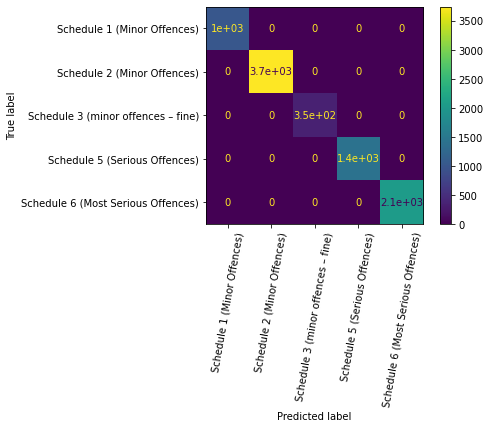

In [33]:
plot_confusion_matrix(lr_model,x_test,y_test,xticks_rotation=80)

In [34]:
# Classification Report
print(classification_report(y_pred,y_test))

                                    precision    recall  f1-score   support

       Schedule 1 (Minor Offences)       1.00      1.00      1.00      1014
       Schedule 2 (Minor Offences)       1.00      1.00      1.00      3746
Schedule 3 (minor offences – fine)       1.00      1.00      1.00       347
     Schedule 5 (Serious Offences)       1.00      1.00      1.00      1405
Schedule 6 (Most Serious Offences)       1.00      1.00      1.00      2061

                          accuracy                           1.00      8573
                         macro avg       1.00      1.00      1.00      8573
                      weighted avg       1.00      1.00      1.00      8573



In [67]:
### Making A Single Prediction
ex = "The suspect, described as a female, approximately tall, with a medium build and blonde hair, was seen by security cameras selecting items from the store shelves and placing them into a large black handbag before leaving the store without paying. The items stolen include clothing and cosmetics, with a total estimated value of $500. The police are investigating the matter and asking anyone with information to come forward. The store is also increasing its security measures to prevent future incidents."

In [68]:
def vectorize_text(text):
    my_vec = tfidf_vec.transform([text])
    return my_vec.toarray()

In [69]:
vectorize_text(ex)

array([[0.        , 0.        , 0.        , 0.33333333, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.33333333, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [70]:
sample1 = vectorize_text(ex)

In [72]:
lr_model.predict(sample1)

array(['Schedule 2 (Minor Offences)'], dtype=object)

In [71]:
# Prediction Prob
lr_model.predict_proba(sample1)

array([[0.03476925, 0.78798099, 0.00948013, 0.05994119, 0.10782844]])

In [41]:
lr_model.classes_

array(['Schedule 1 (Minor Offences)', 'Schedule 2 (Minor Offences)',
       'Schedule 3 (minor offences – fine)',
       'Schedule 5 (Serious Offences)',
       'Schedule 6 (Most Serious Offences)'], dtype=object)

### Model Interpretation
+ Eli5
+ Lime
+ shap

In [48]:
# Load Model Inter Pkg
import eli5

/home/marsh/anaconda3/envs/csir-env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [64]:
# Show the Weight for each prediction
eli5.show_weights(lr_model)

In [49]:
tfidf_vec.get_feature_names()

['2007',
 '32',
 '50',
 '500',
 'abuse',
 'accessories',
 'act',
 'action',
 'activity',
 'aggravating',
 'alcohol',
 'amendment',
 'ammunition',
 'amphetamines',
 'another',
 'any',
 'application',
 'appropriation',
 'appropriationof',
 'arson',
 'article',
 'articles',
 'as',
 'assault',
 'attempted',
 'authorisation',
 'behalf',
 'behavior',
 'believe',
 'belonging',
 'belongs',
 'bicycles',
 'blood',
 'bodily',
 'body',
 'breaks',
 'broad',
 'building',
 'burglary',
 'business',
 'carjacking',
 'carry',
 'carts',
 'cases',
 'cash',
 'categories',
 'category',
 'cause',
 'causing',
 'circumstances',
 'classified',
 'cocaine',
 'commercial',
 'commission',
 'commit',
 'committed',
 'common',
 'company',
 'connection',
 'consist',
 'consists',
 'contained',
 'containers',
 'control',
 'conveyance',
 'crime',
 'crimes',
 'criminal',
 'damage',
 'damaging',
 'dead',
 'death',
 'decisive',
 'defined',
 'definition',
 'delivery',
 'die',
 'died',
 'direct',
 'distribute',
 'drinking',
 'd

In [50]:
# See the actual word of the features
# Method 1
eli5.show_weights(lr_model,feature_names=tfidf_vec.get_feature_names())

In [88]:
# Method 2:
eli5.show_weights(lr_model,vec=tfidf_vec)

In [73]:
# Interpreting a Single Prediction
lr_model.predict(sample1)

array(['Schedule 2 (Minor Offences)'], dtype=object)

In [52]:
sample1

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.22246192, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.22246192, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.22246192, 0.        ,
        0.        , 0.        , 0.        , 0.  

In [74]:
ex

'The suspect, described as a female, approximately tall, with a medium build and blonde hair, was seen by security cameras selecting items from the store shelves and placing them into a large black handbag before leaving the store without paying. The items stolen include clothing and cosmetics, with a total estimated value of $500. The police are investigating the matter and asking anyone with information to come forward. The store is also increasing its security measures to prevent future incidents.'

In [75]:
eli5.show_prediction(lr_model,ex,vec=tfidf_vec)

In [54]:
ex2 = 'He entered the store, approached the cashier, and demanded money from the register while brandishing a firearm.'

In [55]:
lr_model.predict(vectorize_text(ex2))

array(['Schedule 6 (Most Serious Offences)'], dtype=object)

In [56]:
eli5.show_prediction(lr_model, ex2, vec=tfidf_vec)


In [57]:
# Save Model
import joblib

In [58]:
model_file = open("../Apps/models/lr_model_py_09_feb_2022.pkl","wb")
joblib.dump(lr_model,model_file)
model_file.close()

In [99]:
### Method 2: Pipeline Approach
# Transformers
tf_vec = TfidfVectorizer()
# Estimators
lr_clf = LogisticRegression()
nv_clf = MultinomialNB()

In [100]:
from sklearn.pipeline import make_pipeline,Pipeline

In [101]:
pipe_lr = make_pipeline(tf_vec,lr_clf)

In [102]:
pipe_nv = make_pipeline(tf_vec,nv_clf)  

In [103]:
# Steps
pipe_lr.steps

[('tfidfvectorizer',
  TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                  dtype=<class 'numpy.float64'>, encoding='utf-8',
                  input='content', lowercase=True, max_df=1.0, max_features=None,
                  min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                  smooth_idf=True, stop_words=None, strip_accents=None,
                  sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                  tokenizer=None, use_idf=True, vocabulary=None)),
 ('logisticregression',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False))]

In [104]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [105]:
x_train2

10493    illegal possession firearms ammunition
18040                                carjacking
27695                                     arson
15925                                     arson
26335           robbery nonresidential premises
                          ...                  
21575              robbery residential premises
5390          robbery aggravating circumstances
860               burglary residential premises
15795    illegal possession firearms ammunition
23654                                     arson
Name: cleaned_Category, Length: 20002, dtype: object

In [106]:
# Fit Our dataset
pipe_lr = pipe_lr.fit(x_train2,y_train2)

In [107]:
pipe_lr.score(x_test2,y_test2)

1.0

In [108]:
# Fit Our dataset
pipe_nv = pipe_nv.fit(x_train2,y_train2)
pipe_nv.score(x_test2,y_test2)

1.0

In [109]:
pipe_nv.predict([ex])

array(['Schedule 6 (most serious offences)'], dtype='<U36')